In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import konlpy
from nltk import download
import nltk
from nltk.tokenize import RegexpTokenizer
from PIL import Image
from wordcloud import WordCloud
from collections import Counter
import itertools

In [2]:
df = pd.read_excel('./원본데이터/0126_0202.xlsx')
df

,내용
0,"2020년 인구 조사 결과, 미국 조지아주에 거주하는 한국계 미국인은 약 71,00..."
1,맥도날드가 출시한 BTS 세트에서부터 여러 럭셔리 패션 브랜드의 얼굴이 된 블랙핑크...
2,"1월 11일, 베르나르 아르노 LVMH 회장은 딸인 델핀 아르노를 크리스챤 디올의 ..."
3,\n\n한국의 신인 걸그룹 뉴진스가 전 세계 음악계에 돌풍을 일으키고 있다. 이들은...
4,시카고한인문화회관이 윌링(Wheeling)에 새로운 특별행사 건물을 짓는 계획이 승...
...,...
93,선배는 무슨 뜻인가? \n (Sunbae Ne Demek? Korece Hitap ...
94,좀비버스: 넷플릭스의 새로운 인기 폭발 드라마!\n (Zombieverse: Net...
95,넷플릭스 리얼리티 텔레비전 쇼 ‘오징어 게임: 더 챌린지’가 촬영 첫날부터 도마에 ...
96,ㅇ 한국은 많은 드라마를 통해 라면과 김치를 전 세계적으로 유명하게 만드는 데 성공...


In [3]:
# director_df = df[df['내용'].str.contains('게임')]
# director_df = director_df.reset_index(drop=True)

In [4]:
# w = list(director_df['내용'])
# for i in range(len(w)):
#     w[i] = str(w[i])
# content = ' '.join(w)
# content

### 한글

In [5]:
from konlpy.tag import Komoran
kor_stopwords = ['한국', '문화', '사람', '세계', '그룹', '자신','때문','사회','시작','시간','여성','이후','사진','유로','생각','동안','1월','이번','교수','한국문화원','이야기',
                '한국인','이상','참여','모습','올해','의미','사랑','이다','사용','포함','진행','장면','표현','멤버','소개','처음','공간','시장','최근','남성','지원','예정',
                '건물','산업','광둥','인터뷰','참석','방문','참가자','나라','이름','지역','경험','아시아','경우','기록','문제','관련','단어','가지','차지','선배','증가','자막',
                '상품','이유','미래','활동','이해','2월','부문','식당','한국의','작년','국제','인간','필요','사실','시대','모두','사이','서양','달러','북한','어른','목소리','공유',
                '관계','국가','내용','동영상','프레디','1월 22일', '1월 23일', '1월 24일', '1월 25일', '1월 26일', '1월 27일', '1월 28일', '1월 29일', '1월 30일', '1월 31일',
                '1월 1일', '1월 11일', '1월 19일', '1월 12일', '1월 20일','케이', '한국의 문화','한국의 전통','한국의 설날', '한국의 역사','서울','시즌','번역'] 
space = ['헤어질 결심', '오징어 게임', '박찬욱 감독']

komoran = konlpy.tag.Komoran()
komoran = Komoran(userdic='user_dict.txt')

In [6]:
kor_total = []
for news in df['내용']:
    temp = []
    news = news.replace('.', '').replace(',','').replace("'","").replace('·', ' ').replace('=','').replace('\n','').replace('\t','').replace('\r','')
    pos_news = [t for t in komoran.nouns(news)]
    for i in range(len(pos_news)):
        if (pos_news[i] not in kor_stopwords) & (pos_news[i] not in space):
            temp.append(pos_news[i])
        if pos_news[i] in space:
            temp.append(pos_news[i].replace(" ", ""))
    kor_total.append(' '.join(temp))

### 영어

In [7]:
eng_stopwords = ['the', 'The',]
eng_total = []

# 3글자 이상
tokenizer = RegexpTokenizer("[\w']{3,}")

In [8]:
for news in df['내용']:
    temp = []
    news = news.replace('.', '').replace(',','').replace("'","").replace('·', ' ').replace('=','')
    news = re.sub('[^a-zA-Z ]', '', news).strip()
    pos_news = [t for t in tokenizer.tokenize(news)]
    for i in range(len(pos_news)):
        if (pos_news[i] not in eng_stopwords) & (pos_news[i] != 'BTS'):
            temp.append(''.join(pos_news[i]))
        if pos_news[i] == 'BTS':
            temp.append('방탄소년단')
    eng_total.append(' '.join(temp))

### 한글 + 영어 합치기

In [9]:
total = []
for i in range(len(df)):
    temp = []
    temp.append(kor_total[i])
    temp.append(eng_total[i])
    total.append(' '.join(temp))
total

['년 인구 조사 결과 미국 조지 아주 거주 한국계 미국인 명 추정 수 년 계속 이민자 이자 애틀랜타 뮤직 아카데미 설립 김 영해 씨 공동체 희망 영리 단체 웨이브 아웃 리치 음악 예술 전통문화 보존 홍보 행사 2월 4일 토요일 로렌스빌 오로라 시어터 김 씨 진행자 루이 라이 체스 영감 예술 분야 업적 해당 하이라이트 아래 확인 수 애틀랜타 심포니 유스 오케스트라 연주 최 연소 피아니스트 애틀랜타 년 가족 돈 테리 씨 신사 가족 년 피아노 개인 교습 비 지불 영향 심포니 유스 오케스트라 신입 뽑기 오디션 소식 오디션 제안 오디션 합격 당시 음악 누 군가 마음 수 것 혜택 수 미션 것 것 피바디 음악원 졸업 애틀랜타 커뮤니티 커뮤니티 재능 것 당시 선생님 수 분야 선구자 라고 선생님 학생 연결 노력 애틀랜타 뮤직 아카데미 계기 시절 음악 교육 개인 삶 수 시절 음악 것 수 이점 장점 규율 노력 것 가치 개 음표 구절 연습 번 반복 종류 직업의식 분야 성공 수 것 웨이브 아웃 리치 프로젝트 음악 평화 목표 은퇴 후 아이 언가 것 학교 재능 학생 재능 환원 인종 폭력 것 것 서로 것 서로 점 것 것 차이점 점 것 간 부분 것 오해 것 종류 인종 포용 수 연결 것 것 영리 단체 웨이브 아웃 리치 사명 웨이브 번 행사 기념 하루 행사 오후 시 분 시 분 안뜰 식 요리 화장품 약품 놀이 수 로비 그립 도자기 수 의상 수 포토 존 마련 수 식 부채 수 볼거리 시 시 극장 공연 볼거리 전통 북 공연 것 전통 북 공연 행사 때 수 것 공연 북 전통 악기 전통 음악 연주 테너 소프라노 민요 뒤 것 토요일 웨이브 어린이 합창단 공연 공연 노래 방탄소년단 곡 연주 웨이브 현악 앙상블 것 웨이브 심포니 오케스트라 아리랑 것 아리랑 뉴욕 필하모닉 오케스트라 때 연주 곡 마지막 곡 고향의 봄 연주 것 곡 곡 것 이때 무대 태극기 것 웨이브 아웃 리치 번 공연 모금행사 2월 4일 토요일 오로라 극장 티켓 정보 다음 링크 확인 수 글 Young Hae Kim KWave Outreach Ci

### tf-idf

In [10]:
#TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(total)

In [11]:
tfidf_weights = [(word, tfidf.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
tfidf_weights[0:10]

[('인구', 0.06826761076968023),
 ('조사', 0.2755122978024418),
 ('결과', 0.40313775806684615),
 ('미국', 1.4723959460323126),
 ('조지', 0.05400022624356666),
 ('아주', 0.05400022624356666),
 ('거주', 0.27123723658340265),
 ('한국계', 0.05400022624356666),
 ('미국인', 0.1633240890481768),
 ('추정', 0.11119169045927181)]

In [12]:
df = pd.DataFrame(tfidf_weights, columns = ['word', 'tfidf'])
df = df.sort_values('tfidf', ascending=False)
df = df.reset_index(drop=True)
df

,word,tfidf
0,중국,3.173879
1,드라마,2.883698
2,블랙핑크,2.640631
3,영화,2.458518
4,작품,2.250344
...,...,...
5095,유목,0.017794
5096,본거지,0.017794
5097,만족,0.017794
5098,뒤죽박죽,0.017794


In [13]:
final = df.head(100)
final_dict = final.set_index('word').to_dict()['tfidf']
final_dict

{'중국': 3.173878625059917,
 '드라마': 2.8836984787646234,
 '블랙핑크': 2.6406311306597887,
 '영화': 2.4585177825155347,
 '작품': 2.2503442514451213,
 '전시': 2.078136122646904,
 '행사': 1.992015190341313,
 '태국': 1.91645312136904,
 '작가': 1.866125348422801,
 '브랜드': 1.693877718984166,
 '케이팝': 1.6791449118339585,
 '한류': 1.672670049494082,
 '인기': 1.642738933875984,
 '음악': 1.5890180378221204,
 '공연': 1.5382468397337008,
 '미국': 1.4723959460323126,
 '방탄소년단': 1.4685475043236218,
 '설날': 1.4416811983994655,
 '선수': 1.4331342374800233,
 '감독': 1.422082380306816,
 '음식': 1.397950316975913,
 '넷플릭스': 1.3692250115525193,
 '축제': 1.319851630679722,
 '한복': 1.2945454657470208,
 '콘서트': 1.2373739380363227,
 '패션': 1.2262734927255092,
 '역사': 1.197506019190942,
 '일본': 1.1748627883584675,
 '아티스트': 1.1427155995039704,
 '기념': 1.1362115659178649,
 '지민': 1.1269729913221724,
 '파리': 1.1132647673375842,
 '김민재': 1.0661934520109622,
 '엔터테인먼트': 1.064733309270789,
 '새해': 1.0486755546687536,
 '콘텐츠': 1.0440174252387984,
 '프로그램': 1.038351573730

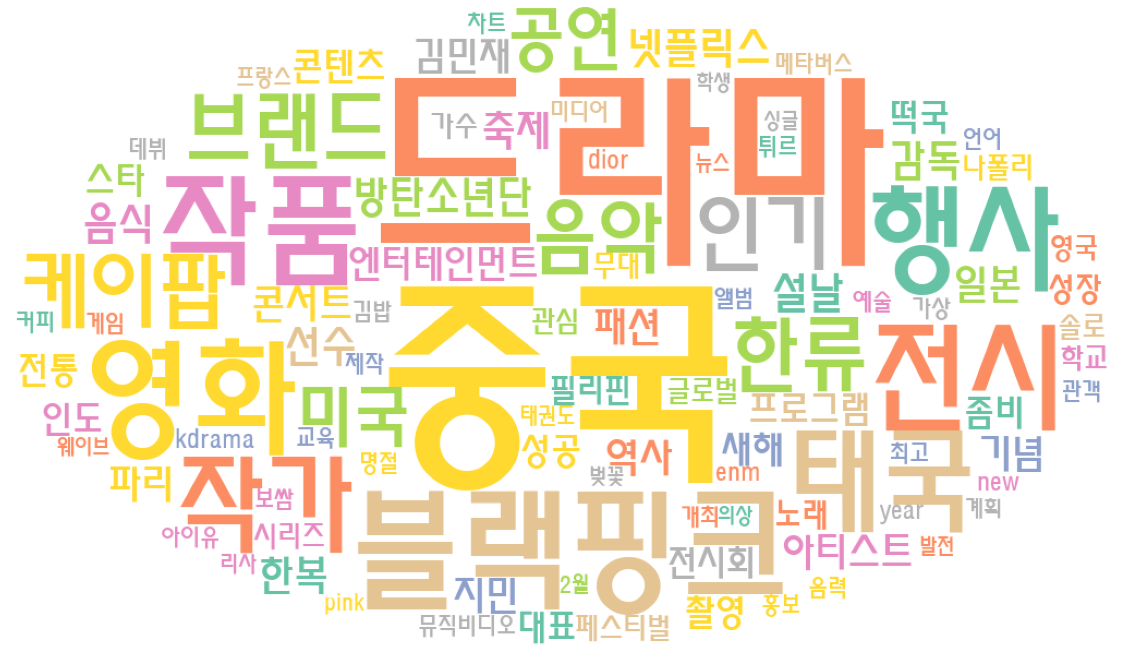

In [14]:
im = Image.open('mask.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환

sns.set_style('white')
font_path = 'C:\Windows\Fonts\HMFMMUEX.TTC'

#prefer_horizontal=Ture -> 글씨 똑바르게 나오게 하기
wc = WordCloud(font_path=font_path, width=1500, height=1200, background_color='white', colormap='Set2', mask=mask_arr, prefer_horizontal=True).fit_words(final_dict)

plt.figure(figsize = (20, 20))  
plt.imshow(wc)
plt.axis('off')
plt.show()

In [15]:
# End of File